# Applied Computational Statistics (ACS)

## HW1

Submit your answers by <b>LT</b>.

# Descriptive Statistics

<b><i>Descriptive statistics</b></i> (sometimes called <b><i>summary statistics</b></i>) are quantitative values we can calculate to summarize information about our dataset. Calculating these statistics is typically the first step when performing exploratory data analysis (EDA).

For this homework, we'll look at a classic introductory machine learning dataset, the [`Titanic Dataset`](https://www.kaggle.com/c/titanic).

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Let's load the dataset using the [`Seaborn`](https://seaborn.pydata.org/) library.

In [2]:
dataset = sns.load_dataset("titanic")
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Most of the column headers (we'll call them features or predictors from now on) are self-explanatory. Click [`here`](https://www.kaggle.com/c/titanic/data) to find a more thorough description of the data.

As a final note, the values that we'll be calculating below are actually called <b><i>sample statistics</b></i> (e.g. sample mean, sample variance, etc.). From a frequentist perspective, they are merely <b><u>estimates</b></u> of the true parameters, which are fixed but unknown.

## Min and Max

Let's get the simple statistics out of the way first. 

<b><i>Min</b></i> and <b><i>Max</b></i> refer to the minimum and maximum data values of a particular feature. Note that this does not refer to the <i>theoretical</i> min and max values that the feature can take.

They are occasionally called the <b><i>zeroth quartile</b></i> and <b><i>fourth quartile</b></i>, respectively. Not everyone accepts this definition though, as it does not make sense formally.

#### Q1.

Calculate the min and max values of the `age` variable.

In [3]:
age_min = dataset['age'].min()
age_max = dataset['age'].max()

print('Age Min:', age_min)
print('Age Max:', age_max)

Age Min: 0.42
Age Max: 80.0


#### Q2.

Calculate the min and max values of the `fare` variable.

In [4]:
fare_min = dataset['fare'].min()
fare_max = dataset['fare'].max()

print('Fare Min:', fare_min)
print('Fare Max:', fare_max)

Fare Min: 0.0
Fare Max: 512.3292


## Quantiles and Percentiles

Now for some formal discussion.

Let $X$ be a r.v. with cdf $F$.

For each $p \in \left[0, 1\right]$, define $F^{-1}(p)$ to be the smallest value $x$ such that $F(x) \geq p$. 

Then $F^{-1}(p)$ is called the $p$ <b><i>quantile</b></i> of $X$ or the $100p$ <b><i>percentile</b></i> of $X$.

The function $F^{-1}$ is called the <b><i>quantile function</b></i> of $X$.

Quantiles are used as cut points that divide a probability distribution into intervals of equal probability. For example, the <b><i>quartiles</b></i> of a distribution are defined by three points that split the distribution into four equally-sized groups. These points are the 25th, 50th, and 75th percentile.

#### Q3.

Calculate the 80th, 90th, and 99th percentile of `fare`. Ignore NaN values.

In [5]:
fare_80p = dataset['fare'].quantile(0.8)
fare_90p = dataset['fare'].quantile(0.9)
fare_99p = dataset['fare'].quantile(0.99)

print('Fare 80th %-ile:', fare_80p)
print('Fare 90th %-ile:', fare_90p)
print('Fare 99th %-ile:', fare_99p)

Fare 80th %-ile: 39.6875
Fare 90th %-ile: 77.9583
Fare 99th %-ile: 249.00622000000033


#### Q4.

Calculate the first, second, and third quartiles for `age`.

Create a [`KDE plot`](https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde) for `age` and overlay the quartiles by plotting red vertical lines.

Ignore NaN values.

Age 1st Quartile: 20.125
Age 2nd Quartile: 28.0
Age 3rd Quartile: 38.0


<Figure size 1200x800 with 0 Axes>

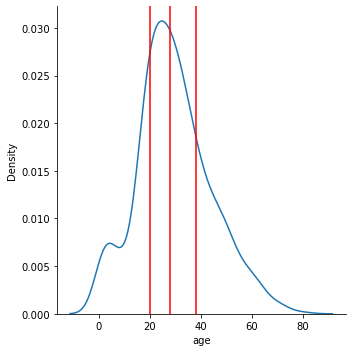

In [6]:
dataset['age'] = dataset['age'].dropna()
age_quant1 = dataset['age'].quantile(0.25)
age_quant2 = dataset['age'].quantile(0.50)
age_quant3 = dataset['age'].quantile(0.75)

print('Age 1st Quartile:', age_quant1)
print('Age 2nd Quartile:', age_quant2)
print('Age 3rd Quartile:', age_quant3)

plt.figure(figsize=(12,8), dpi=100)
sns.displot(dataset, x="age", kind="kde")
for quartile in [age_quant1, age_quant2, age_quant3]:
    plt.axvline(quartile, color='red')
plt.show()

## Measures of Central Tendency

### Mean

The <b><i>sample mean</b></i> $\bar{x}$ of a feature $X$ with data points $x_1, x_2, \ldots, x_n$ is defined as

$$\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i$$

#### Q5.

Calculate the sample mean of `age`. Ignore NaN values.

In [7]:
age_mean = dataset['age'].mean(skipna=True)

print('Age Mean:', age_mean)

Age Mean: 29.69911764705882


### Median

The <b><i>median</b></i> is defined as the 50th percentile. It is the value that divides the data into two equal groups.

More formally, every number $m$ with the following property is called the median of a r.v. $X$:

$$P(X \leq m) \geq 0.5 \quad \text{ and } \quad P(X \geq m) \geq 0.5$$

Note that there can be more than one median.

#### Q6.

Calculate the median of `age`. Ignore NaN values.

In [8]:
age_median = dataset['age'].median()

print('Age Median:', age_median)

Age Median: 28.0


### Mode

The <b><i>mode</b></i> is defined as the most frequent value. It corresponds to the maxima of a distribution. 

Distributions with just one maxima are called <b><i>unimodal</b></i>, while those with multiple maximas are called <b><i>multi-modal</b></i> (e.g. a distribution with two modes is called <b><i>bimodal</b></i>).

For continuous distributions (subject to certain assumptions), we can find the modes by finding the maximum of a pdf $f$, i.e. solving

$$\frac{d}{dx}f(x) = 0$$

#### Q7.

Calculate the mode of `age`. Ignore NaN values.

In [9]:
age_mode = dataset['age'].mode()[0]

print('Age Mode:', age_mode)

# YOUR CODE HERE
#raise NotImplementedError()

Age Mode: 24.0


## Measures of Spread / Dispersion

### Variance / Standard Deviation

The (unbiased) <b><i>sample variance</b></i> $s^2$ of a feature $X$ with data points $x_1, x_2, \ldots, x_n$ is defined as

$$s^2 = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2$$

The <b><i>sample standard deviation</b></i> $s$ is the non-negative square root of the sample variance.

#### Q8.

Calculate the <b><u>unbiased</b></u> sample variance and sample standard deviation of `age`. Ignore NaN values.

In [10]:
age_var = dataset.age.var()
age_std = dataset.age.std()

print('Age Var:', age_var)
print('Age Stdev:', age_std)

Age Var: 211.0191247463081
Age Stdev: 14.526497332334044


### Range

The <b><i>range</b></i> of your data is defined as difference between the maximum and minimum values. It gives you an idea about the span or width your data values.

#### Q9.

Calculate the range of `age`. Ignore NaN values.

In [11]:
age_range = max(dataset.age.dropna()) - min(dataset.age.dropna())

print('Age Range:', age_range)

Age Range: 79.58


### Interquartile Range (IQR)

The <b><i>interquartile range</b></i> (IQR) defined as the difference between the 75th and 25th percentile. It is typically used when creating box plots, and is also used as a proxy for variance when expectations do not exist (e.g. Cauchy distribution).

#### Q10.

Calculate the IQR of `age`. Ignore NaN values.

In [35]:
age_iqr = dataset['age'].quantile(0.75) - dataset['age'].quantile(0.25)

print('Age IQR:', age_iqr)

Age IQR: 17.875


## Higher Moments

Beyond centrality and spread, there are two higher moment statistics used to describe the shape of a distribution.

### Skewness

The <b><i>skewness</b></i> of a distribution measures the degree of asymmetry of a distribution around the mean. Its value can be positive, zero, negative, or undefined.

For unimodal distributions, negative skew means that the tail of the distribution is on the left side, while a positive skew indicates that the tail is on the right. For example, if we apply the exponential function on a r.v. $X$ with Normal distribution (which has zero skew since it is symmetric), we create a new r.v. $Y = \exp(X)$ which has a [`log-normal distribution`](https://en.wikipedia.org/wiki/Log-normal_distribution) and is positively skewed.

Formally, the skewness of a r.v. $X$ is defined as

$$\tilde{\mu}_3 = E\left[\left(\frac{X - \mu}{\sigma}\right)^3\right]$$

The <b><i>sample skewness</b></i> is

$$\frac{\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^3}{s^3}$$

which has a biased and unbiased version, see [`here`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html) for the bias correction.

#### Q11.

Calculate the <b><u>unbiased</b></u> sample skewness of `age`. Ignore NaN values.

In [13]:
age_skew = stats.skew(dataset['age'].dropna(), bias=False, nan_policy='omit')
print('Age Skewness:', age_skew)

Age Skewness: 0.3891077823008268


### Kurtosis

The <b><i>kurtosis</b></i> of a distribution measures its "tailedness" (i.e. how heavy the tails are). In essence, a higher kurtosis indicates a greater probability of outliers occurring. A description of the types of kurtosis (<b><i>Mesokurtic</b></i>, <b><i>Leptokurtic</b></i>, and <b><i>Platykurtic</b></i>) can be read [`here`](https://en.wikipedia.org/wiki/Kurtosis#Excess_kurtosis).

Formally, the kurtosis of a r.v. $X$ is defined as

$$\tilde{\mu}_4 = E\left[\left(\frac{X - \mu}{\sigma}\right)^4\right]$$

The <b><i>sample kurtosis</b></i> is

$$\frac{\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^4}{\left[\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2\right]^2} - 3$$

which has a biased and unbiased version, see [`here`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html).

#### Q12.

Calculate the <b><u>unbiased</b></u> sample kurtosis of `age`. Ignore NaN values.

In [14]:
age_kurt = stats.kurtosis(dataset['age'].dropna(), bias=False, nan_policy='omit')

print('Age Kurtosis:', age_kurt)

Age Kurtosis: 0.17827415364210308


---

## Exploratory Data Analysis

In this section, we'll be doing some <i>guided</i> EDA. Note that it's usually the data scientist's job to formulate their own questions when performing EDA.

You can <b><u>be as creative as you want</b></u> when answering the questions below (you can also be as simple as you want). You can create plots, calculate statistics, fit fancy models, etc.

## Survival Analysis

#### Q13.

In the Titanic movie, they let women and children on the lifeboats first. One would then be lead to believe that women and children had a higher chance of survival.

Does the data support this idea?

In [15]:
pd.crosstab(dataset['sex'], dataset['alive'])

alive,no,yes
sex,,
female,81,233
male,468,109


alive,no,yes
sex,,
female,0.147541,0.681287
male,0.852459,0.318713


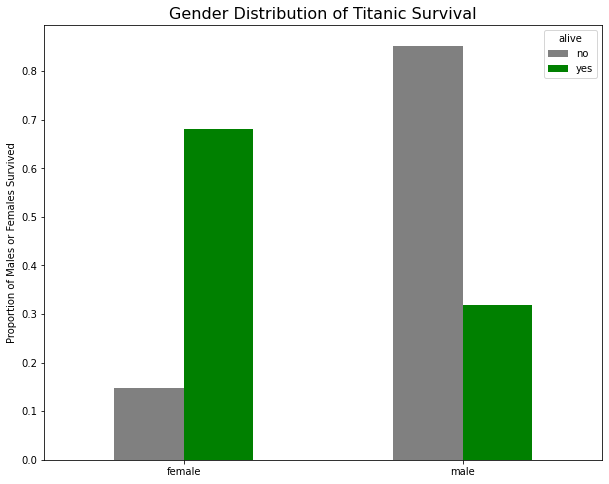

In [16]:
df = pd.crosstab(dataset['sex'], dataset['alive'], normalize='columns')
df.plot(kind='bar', color=['gray', 'green'], figsize=(10,8), rot=0)
plt.title('Gender Distribution of Titanic Survival', fontsize=16)
plt.xlabel('')
plt.ylabel('Proportion of Males or Females Survived');
df

Out of those that have survived the Titanic, 68% of them were females. On the other hand, 85% of those that have died from the sinking of the Titanic were males. From the visualizations above, we can conclude that women had higher chances of survival. The frequencies for each gender were normalized with respect to the total number of survivors and deaths due to the Titanic.

In [17]:
pd.crosstab(dataset['who'], dataset['alive'])

alive,no,yes
who,,
child,34,49
man,449,88
woman,66,205


alive,no,yes
who,,
child,0.409639,0.590361
man,0.836127,0.163873
woman,0.243542,0.756458


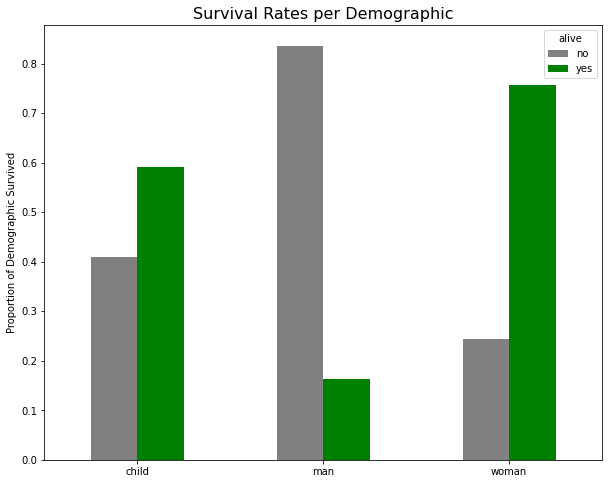

In [18]:
df = pd.crosstab(dataset['who'], dataset['alive'], normalize='index')
df.plot(kind='bar', color=['gray', 'green'], figsize=(10, 8), rot=0)
plt.title('Survival Rates per Demographic', fontsize=16)
plt.xlabel('')
plt.ylabel('Proportion of Demographic Survived');
df

Out of all children that were aboard the Titanic, 59% have survived. Likewise, 75% of adult women in the Titanic were able to survive. Unfortunately, 83% of adult male people that were in the ship has died.

In [19]:
import statsmodels.api as sm

who = pd.get_dummies(dataset['who']) # construct dummy variables for who
dataset = dataset.merge(who, left_index=True, right_index=True)
model = sm.Logit(dataset['survived'], 
                 sm.add_constant(dataset[['child', 'woman']])).fit()
model.summary() # logistic regression model

Optimization terminated successfully.
         Current function value: 0.500707
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      888
Method:                           MLE   Df Model:                            2
Date:                Wed, 14 Jul 2021   Pseudo R-squ.:                  0.2481
Time:                        16:20:32   Log-Likelihood:                -446.13
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.183e-64
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6297      0.117    -13.979      0.000      -1.858      -1.401
child          1.9951      0.252      7.923      0.000       1.502       2.489
woman          2.7630      0.183     15.069      0.000       2.404       3.122
==============================================================================
"""

In [20]:
# to calculate the odds ratio
np.exp(model.params)

const     0.195991
child     7.353275
woman    15.847968
dtype: float64

By performing a logistic regression model, we are able to identify the effect of a passenger's demographic on one's survival. From the results of the logistic regression model, we can conclude that children and women had an increasing effect on survival (as represented by positive coefficient values). Calculating the odds ratios, we are able to conclude that women and children has 15.84 and 7.35 times more odds of surviving the Titanic relative to males respectively.

#### Q14.

Also in the movie, you can see rich people arguing that they should be allowed on the lifeboats first. 

From the data, how can you identify the "rich" passengers? 

Did rich passengers end up surviving more compared to the poorer passengers?

alive,no,yes
class,,
First,0.370370,0.629630
Second,0.527174,0.472826
Third,0.757637,0.242363


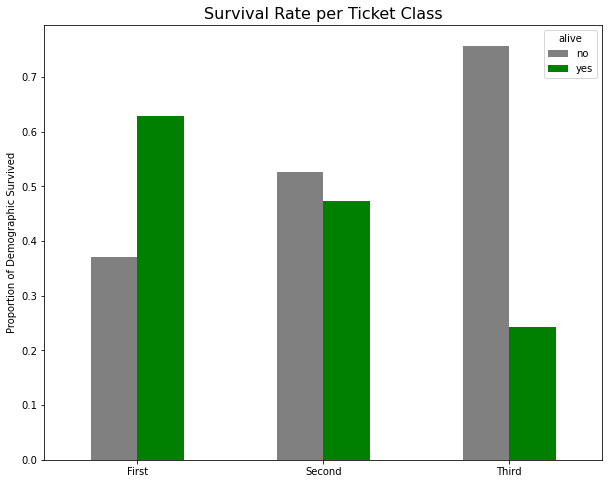

In [21]:
df = pd.crosstab(dataset['class'], dataset['alive'], normalize='index')
df.plot(kind='bar', color=['gray', 'green'], figsize=(10, 8), rot=0)
plt.title('Survival Rate per Ticket Class', fontsize=16)
plt.xlabel('')
plt.ylabel('Proportion of Demographic Survived');
df

From the visualization above, we can see that 63% of first class ticket holders have survived the Titanic. Although there were more second class ticket holders that have died rather than survived, the difference between the number of people that have survived and died in the third class is drastic. Out of 491 third-class ticket holders, only 24% have survived.

In [22]:
# this code will yield an error when run more than once, as the variable names
# of First and Second would change if the get_dummies() code is run again

ticket_class = pd.get_dummies(dataset['class']) 
dataset = dataset.merge(ticket_class, left_index=True, right_index=True)
model_2 = sm.Logit(dataset['survived'], 
                 sm.add_constant(dataset[['First', 'Second']])).fit()
model_2.summary() # logistic regression model

Optimization terminated successfully.
         Current function value: 0.607805
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      888
Method:                           MLE   Df Model:                            2
Date:                Wed, 14 Jul 2021   Pseudo R-squ.:                 0.08726
Time:                        16:20:32   Log-Likelihood:                -541.55
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 3.274e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1398      0.105    -10.822      0.000      -1.346      -0.933
First          1.6704      0.176      9.496      0.000       1.326       2.015
Second         1.0310      0.181      5.684      0.000       0.675       1.386
==============================================================================
"""

In [23]:
np.exp(model_2.params)

const     0.319892
First     5.314286
Second    2.803777
dtype: float64

From the logistic regression results above, we can see that rich people that has booked first class tickets have 5.3 times more odds of survival relative to third class passengers. On the other hand, second class passengers have 2.8 times more odds of survival relative to third class passengers. Lastly, the negative sign of the constant in the logistic regression model indicates that third class passengers have a decreasing effect on the probability of their survival from the Titanic.

#### Q15.

One could make the argument that young people should be let on the lifeboats first, since they have more of life to look forward to!

How would you quantitatively define "young" and "old"?

Did a young person have a better chance of surviving the incident compared to an old person?

In [24]:
print('Oldest young person: ', dataset[dataset['who'] == 'child']['age'].max())

Oldest young person:  15.0


alive,no,yes
child,,
old,0.637376,0.362624
young,0.409639,0.590361


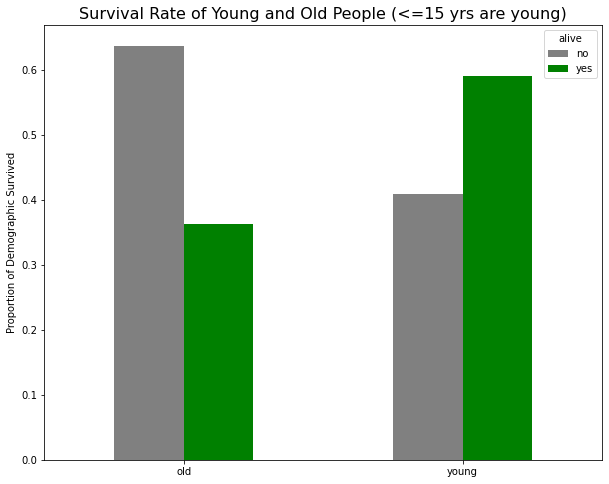

In [25]:
df = pd.crosstab(dataset['child'], dataset['alive'], normalize='index')
df = df.rename(index={0: 'old', 1: 'young'})
df.plot(kind='bar', color=['gray', 'green'], figsize=(10, 8), rot=0)
plt.title('Survival Rate of Young and Old People (<=15 yrs are young)', 
          fontsize=16)
plt.xlabel('')
plt.ylabel('Proportion of Demographic Survived');
df

From the visualization above, we can see that more young people aged 15 years old or below have survived the Titanic relative to older people aged 16 years old and beyond. Out of all the young people aged 15 years old or below, 59% has survived. However, 60% of people aged 16 years old and above did not survive from the Titanic.

In [26]:
model_3 = sm.Logit(dataset['survived'], 
                   sm.add_constant(dataset['child'])).fit()
model_3.summary() 

Optimization terminated successfully.
         Current function value: 0.656945
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Jul 2021   Pseudo R-squ.:                 0.01347
Time:                        16:20:33   Log-Likelihood:                -585.34
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 6.404e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5640      0.073     -7.707      0.000      -0.707      -0.421
child          0.9295      0.235      3.957      0.000       0.469       1.390
==============================================================================
"""

In [27]:
np.exp(model_3.params)

const    0.568932
child    2.533126
dtype: float64

From the result of the logistic regression model above, young people aged 15 years old and below have twice more odds of surviving the Titanic relative to older people aged 16 years old and above. The negative constant of the logistic regression model would show a decreasing effect on the probability of survival of old people.

#### Q16.

Were there families traveling together?

How would you estimate the number of families on board the ship?

From the data dictionary, the column ``sibsp`` refers to the number of siblings or spouses that a particular passenger brought to the Titanic whereas the column ``parch`` refers to the number of parents or children aboard the Titanic. With these definitions, we considered any passenger having their sibling, spouse, parent, or children along with them as a passenger travelling with their family. By applying the code above, we are able to estimate that there are 354 passengers travelling with families that boarded the Titanic.

In [28]:
mask = (dataset['sibsp'] > 0) | (dataset['parch'] > 0)
# to get the number of passengers that travelled with their families
passenger_with_fam = dataset[mask].shape[0] 
passenger_with_fam

354

Since we want to calculate the number of families, we need to divide 354 by the average number of family members that these 354 passengers have brought into the Titanic (as they are assumed to be accounted for as well in this dataset).

With this, we take the mean of the ``sibsp`` and ``parch`` columns and then add these two values to get the total number of family members that each individual has brought into the Titanic.

In [29]:
# average number of sibsp and parch
ave = dataset[mask][['sibsp', 'parch']].mean()
total_fam_members_per_individual = ave.sum()
total_fam_members_per_individual # we round this up

2.2768361581920904

We now divide the number of passengers in the Titanic by the estimated total number of family members per individual to get the total number of families on board.

In [30]:
import math
passenger_with_fam / math.ceil(total_fam_members_per_individual)

118.0

*Hence*, we estimate that there are 118 families that are in the Titanic.

## Insight

Data scientists are like alchemists: building machine learning models looks like magic and our job is to turn data into gold. 

The "gold" we make could literally refer to profit of the companies we work for, but more generally, it refers to the insights we glean from data that allow stakeholders to make better decisions. This leads to things like lower costs, quality improvements to services, etc. (which leads to more profit at the end of the day anyway)

#### Q17.

Based on the dataset, surface <b><u>one insight</b></u>, i.e. make a statement and defend it using the data.

The insight does not have to be about survival rates. It can be anything interesting, impactful, contrary to a person's intuition, etc.

In [31]:
def family(sibsp, parch):
    if sibsp > 0 or parch > 0:
        return 'Yes'
    else:
        return 'No'

dataset['family'] = dataset.apply(lambda x: family(x['sibsp'], x['parch']),
                                  axis=1)
dataset.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,embark_town,alive,alone,child,man,woman,First,Second,Third,family
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,Southampton,no,False,0,1,0,0,0,1,Yes
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,Cherbourg,yes,False,0,0,1,1,0,0,Yes
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,Southampton,yes,True,0,0,1,0,0,1,No
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,Southampton,yes,False,0,0,1,1,0,0,Yes
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,Southampton,no,True,0,1,0,0,0,1,No
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,...,Queenstown,no,True,0,1,0,0,0,1,No
6,0,1,male,54.0,0,0,51.8625,S,First,man,...,Southampton,no,True,0,1,0,1,0,0,No
7,0,3,male,2.0,3,1,21.0750,S,Third,child,...,Southampton,no,False,1,0,0,0,0,1,Yes
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,...,Southampton,yes,False,0,0,1,0,0,1,Yes
9,1,2,female,14.0,1,0,30.0708,C,Second,child,...,Cherbourg,yes,False,1,0,0,0,1,0,Yes


alive,no,yes
family,,
Boarded alone,0.696462,0.303538
Boarded with family,0.494350,0.505650


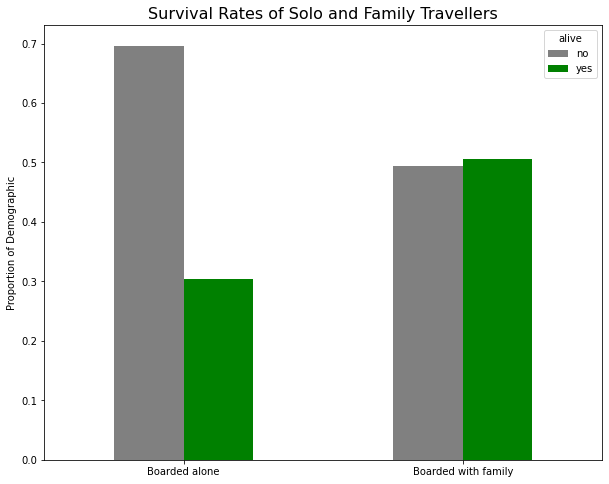

In [32]:
df = pd.crosstab(dataset['family'], dataset['alive'], normalize='index')
df = df.rename(index={'No': 'Boarded alone', 'Yes': 'Boarded with family'})
df.plot(kind='bar', color=['gray', 'green'], figsize=(10, 8), rot=0)
plt.title('Survival Rates of Solo and Family Travellers', fontsize=16)
plt.xlabel('')
plt.ylabel('Proportion of Demographic');
df

From the visualization above, we can see that close to 70% of individuals that boarded the Titanic alone (without their families) have died. There seems to be an equal number of passengers who boarded the Titanic with their families which survived and died. Perhaps this could have been the case as passengers that were alone were prioritized lower (on the allocation for lifeboat space) compared to those passengers that brought along their families with them, which may have included children as well.

In [33]:
dataset = dataset.replace({'family': {'Yes': 1, 'No': 0}})
model_4 = sm.Logit(dataset['survived'], 
                   sm.add_constant(dataset['family'])).fit()
model_4.summary() 

Optimization terminated successfully.
         Current function value: 0.645319
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Jul 2021   Pseudo R-squ.:                 0.03092
Time:                        16:20:33   Log-Likelihood:                -574.98
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.381e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8305      0.094     -8.849      0.000      -1.014      -0.647
family         0.8531      0.142      6.016      0.000       0.575       1.131
==============================================================================
"""

In [34]:
np.exp(model_4.params)

const     0.435829
family    2.346924
dtype: float64

From the result of the logistic regression model, it can be seen that passengers that brought along their families with them have twice more odds of survival relative to those that did not.